In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Food_Preference.csv',parse_dates=['Timestamp'])

### Data Cleaning and Wrangling

In [3]:
df.head()

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019-05-07 14:59:13-08:00,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019-05-07 14:59:45-08:00,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019-05-07 15:00:05-08:00,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019-05-07 15:00:11-08:00,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019-05-07 15:02:50-08:00,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe


Removing Timestamp and Participant ID due to no use

In [4]:
df.drop(['Timestamp','Participant_ID'],axis=1,inplace=True)

#### Filling NA Values

In [5]:
df.isnull().sum()

Gender         4
Nationality    0
Age            0
Food           0
Juice          0
Dessert        0
dtype: int64

In [6]:
df[df.Gender.isna()]

,Gender,Nationality,Age,Food,Juice,Dessert
14,NaN,Muslim,27,Traditional food,Fresh Juice,Yes
225,NaN,Indian,30,Traditional food,Fresh Juice,Yes
268,NaN,Indian,23,Traditional food,Fresh Juice,Yes
277,NaN,Indian,26,Traditional food,Fresh Juice,Yes


In [7]:
df.Gender.value_counts()

Female    165
Male      119
Name: Gender, dtype: int64

In [8]:
df.Gender.fillna('Female',inplace=True)

In [9]:
df.Nationality.unique()

array(['Indian', 'Pakistani ', 'Tanzanian', 'Indonesia', 'Muslim',
       'Pakistan', 'Maldivian ', 'MY', 'Malaysian', 'Malaysian ',
       'Indonesian ', 'Maldivian', 'MALAYSIAN', 'Malaysia ', 'Pakistani',
       'Canadian', 'Nigerian ', 'Algerian ', 'Korean ', 'Seychellois',
       'Indonesain', 'Indonesian', 'Malaysia', 'Japan', 'China',
       'Mauritian', 'Yemen'], dtype=object)

In [10]:
df.Nationality.value_counts()

Indian         241
Malaysian       10
Indonesia        7
Pakistani        3
Japan            2
Maldivian        2
MY               2
Pakistani        2
Algerian         1
Canadian         1
Seychellois      1
Korean           1
Muslim           1
Malaysia         1
China            1
Malaysia         1
Indonesian       1
Nigerian         1
MALAYSIAN        1
Tanzanian        1
Indonesian       1
Yemen            1
Mauritian        1
Pakistan         1
Indonesain       1
Maldivian        1
Malaysian        1
Name: Nationality, dtype: int64

In [11]:
df.Nationality = df.Nationality.apply(lambda x: x.lower())
df.Nationality = df.Nationality.apply(lambda x: x.strip())
def simp(s):
    if s=='pakistan':
        return 'pakistani'
    elif s=='my':
        return 'malaysian'
    elif s=='malasysia':
        return 'malaysian'
    elif s=='indonesia':
        return 'indonesian'
    elif s=='indonesain':
        return 'indonesian'
    elif s=='malaysia':
        return "malaysian"
    else:
        return s

In [12]:
df.Nationality = df.Nationality.apply(simp)

In [13]:
Nations = list(df.Nationality.apply(simp).value_counts().head(4).index)

In [14]:
df2 = df[df.Nationality.isin(Nations)]

In [15]:
df2.describe()

,Age
count,273.000000
mean,30.846154
std,11.405871
min,8.000000
25%,24.000000
50%,28.000000
75%,37.000000
max,80.000000


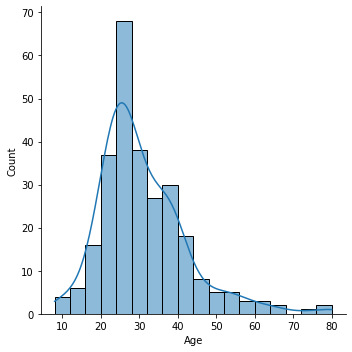

In [16]:
sns.displot(df2.Age,kde=True)

In [17]:
df2.Age.quantile(0.99)

68.95999999999981

In [18]:
df3  = df2[-(df2.Age>70)]

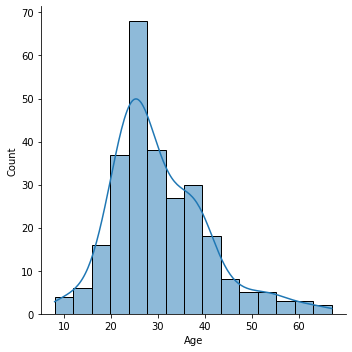

In [19]:
sns.displot(df3.Age,kde=True)

In [20]:
df3.Food.unique()

array(['Traditional food', 'Western Food'], dtype=object)

In [21]:
df3.Juice.unique()

array(['Fresh Juice', 'Carbonated drinks'], dtype=object)

In [22]:
df3.Dessert.unique()

array(['Maybe', 'Yes', 'No'], dtype=object)

In [23]:
df3.Nationality.value_counts()

indian        238
malaysian      16
indonesian     10
pakistani       6
Name: Nationality, dtype: int64

using nationality as Indian because we do not have to much data for another Nationalities

### EDA and Data Visualization

In [24]:
indian = df3[df3.Nationality == 'indian']

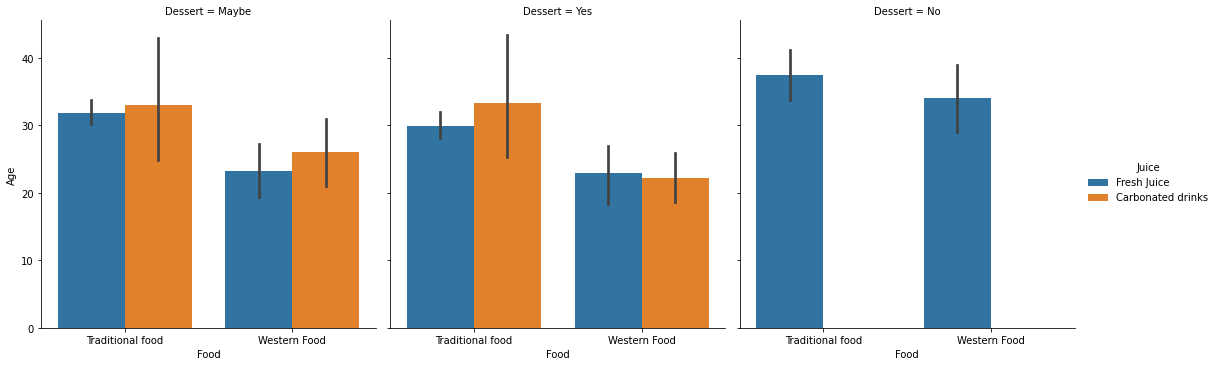

In [25]:
sns.catplot(y = 'Age',x = 'Food',data=indian,kind='bar',hue='Juice',col='Dessert')

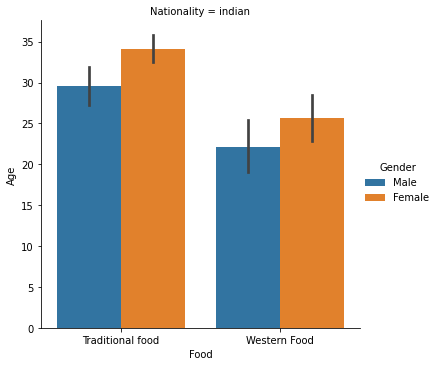

In [26]:
sns.catplot(y = 'Age',x = 'Food',data=indian,kind='bar',hue='Gender',col='Nationality')

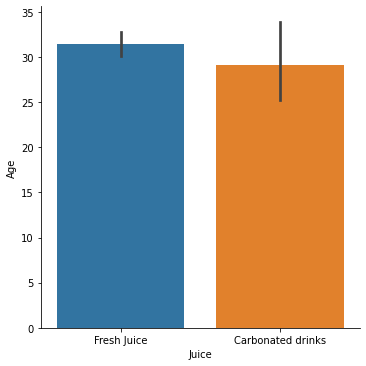

In [27]:
sns.catplot(y = 'Age',x = 'Juice',data=indian,kind='bar')

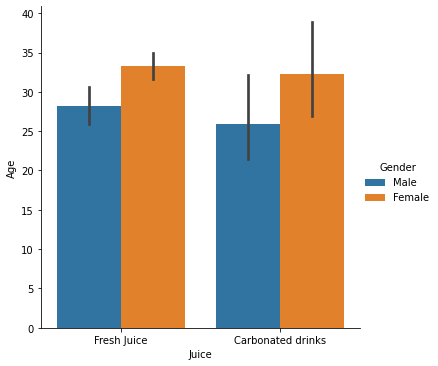

In [28]:
sns.catplot(y = 'Age',x = 'Juice',data=indian,kind='bar',hue='Gender')
plt.show()

#### Interpretation
This Chart shows that Western food eaters are quite younger than Traditional Food eaters, According to this survey the Person, who do not take desserts, also not taking Carbonated Drinks and taking Fresh Juice,This can be due to Diabetic Patient or Health conscious, while those who take dessert are more likely to be take carbonated Drinks over Fresh Juice.